In [1]:
import matplotlib.pyplot as plt
import numpy as np
from optix import *

# Gaussovský svazek na výstupu z vlákna
Vlákno je označeno OE-000592. Bohužel na stránce TOPTICY žádné takové nanabízejí. Proto počítám se sepcifikami vláken https://www.toptica.com/products/optical-isolators-photonicals/photonicals/optical-fibers.

Pro získání Rayleigho vzdálenosti využit vzorec https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=14204


        amplitude	=	1,
        wavelength	=	405.0 nm,
        waist_loc	=	0 cm,
        waist_rad	=	0.0017500000000000003 mm,
        rayleigh_r	=	0.023755870374367265 mm,
        divergence	=	4.22075102144367 degrees
        


Text(0, 0.5, 'Beam diameter [mm]')

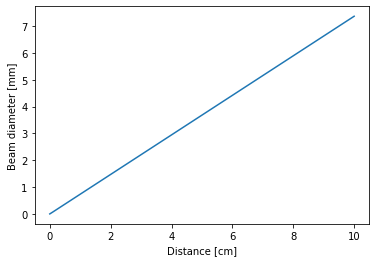

In [2]:
MFD = 3.5e-6
NA = 0.07
WAVE_LENGTH = 405e-9
zr = math.pi / WAVE_LENGTH * (MFD / 2)**2   
fiber_out = GaussianBeam(WAVE_LENGTH, zr=zr)
print(fiber_out)


z = np.linspace(0, 0.1, 100)
w = fiber_out.beam_radius(z)
plt.plot(z*10**2, w*10**3)
plt.xlabel("Distance [cm]")
plt.ylabel("Beam diameter [mm]")


# Propagace systémem


        amplitude	=	1,
        wavelength	=	405.0 nm,
        waist_loc	=	190.82874939217663 cm,
        waist_rad	=	0.06324952129112509 mm,
        rayleigh_r	=	31.03196917666357 mm,
        divergence	=	0.11678055638601081 degrees
        
Divergence: 0.0020382052112467787 mrad


Text(0, 0.5, 'W [mm]')

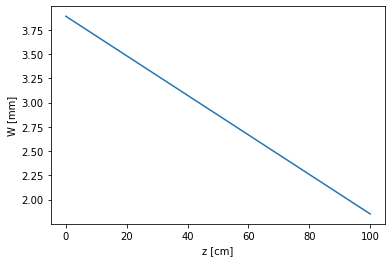

In [48]:
gauss_in = fiber_out
op = OpticalPath()
op.append(FreeSpace(d=4.9e-2))
# op.append(ThickLens(R1=float('inf'), R2=18e-3, n=1.5168, d=7e-3)) # Thorlabs LA1027-A -> 35mm
op.append(ThickLens(R1=float('inf'), R2=25.8e-3, n=1.5168, d=5.3e-3)) # Thorlabs LA1131-A -> 50mm
gauss_out = op.propagate(gauss_in)

print(gauss_out)
print(f"Divergence: {gauss_out.divergence} mrad")

z = np.linspace(0,1,100)
w = gauss_out.beam_radius(z)
plt.plot(z*10**2,w*10**3)
plt.xlabel("z [cm]")
plt.ylabel("W [mm]")

